# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [2]:
'''
Given a list of number distribution it returns a mean and std of a gaussian distributions
'''
def RetParameters(X_train,y_train):
    m = len(np.unique(y_train))
    n = X_train.shape[1]
    GaussianParam=[]
    for j in range(m): 
        att = np.array([X_train[i] for i in range(len(X_train)) if y_train[i]==j+1])
        GaussianParam.append([[np.mean(att[:,i]), np.std(att[:,i])] for i in range(n)])
    return GaussianParam

### Calculate priors

Write a function to calculate the priors for each class.

In [3]:
def ComputePrior(y_train):
    m=len(np.unique(y_train)) # number of class
    classes, counts = np.unique(y_train, return_counts=True)
    Prior =[counts[i]/len(y_train) for i in range(m)]
    return Prior

def ComputeGaussian(x,mu,sigma):
    return (1/(np.sqrt(2*np.pi*(sigma**2))))*np.exp(-(((x-mu)**2)/(2*(sigma**2))))

### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

In [4]:
'''
Param = RetParameters(X_train,y_train)
Prior = ComputePrior(y_train)
test_sample = sample_attribute to be tested
m= number of classes
'''
def Likelihood(Param,Prior,test_sample,m):
    p= np.ones(m)
    for j in range(m):
        for i,t in enumerate(test_sample):
            p[j]*=ComputeGaussian(t,Param[j][i][0],Param[j][i][1])
        p[j]*=Prior[j]
    pred = np.argmax(p)
    return pred+1    

>One common problem with the likelihoods is that if the features are highly correlated, the covariance matrix can become ill-conditioned or singular, which can result in numerical instability or even a division-by-zero error. To fix this, we can use a technique called regularization, which adds a small positive value to the diagonal elements of the covariance matrix to make it invertible.

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [5]:
data = pd.read_csv('wifiLocalization.txt', sep='\t')
data.describe()

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [6]:
from sklearn.model_selection import train_test_split
X,y = data.drop(['r'],axis=1),data['r']
print(f'X: {X.shape}')
print(f'y: {y.shape}')
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print()

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X: (2000, 7)
y: (2000,)

X_train: (1500, 7)
y_train: (1500,)

X_test: (500, 7)
y_test: (500,)


### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

(4, 7, 2)


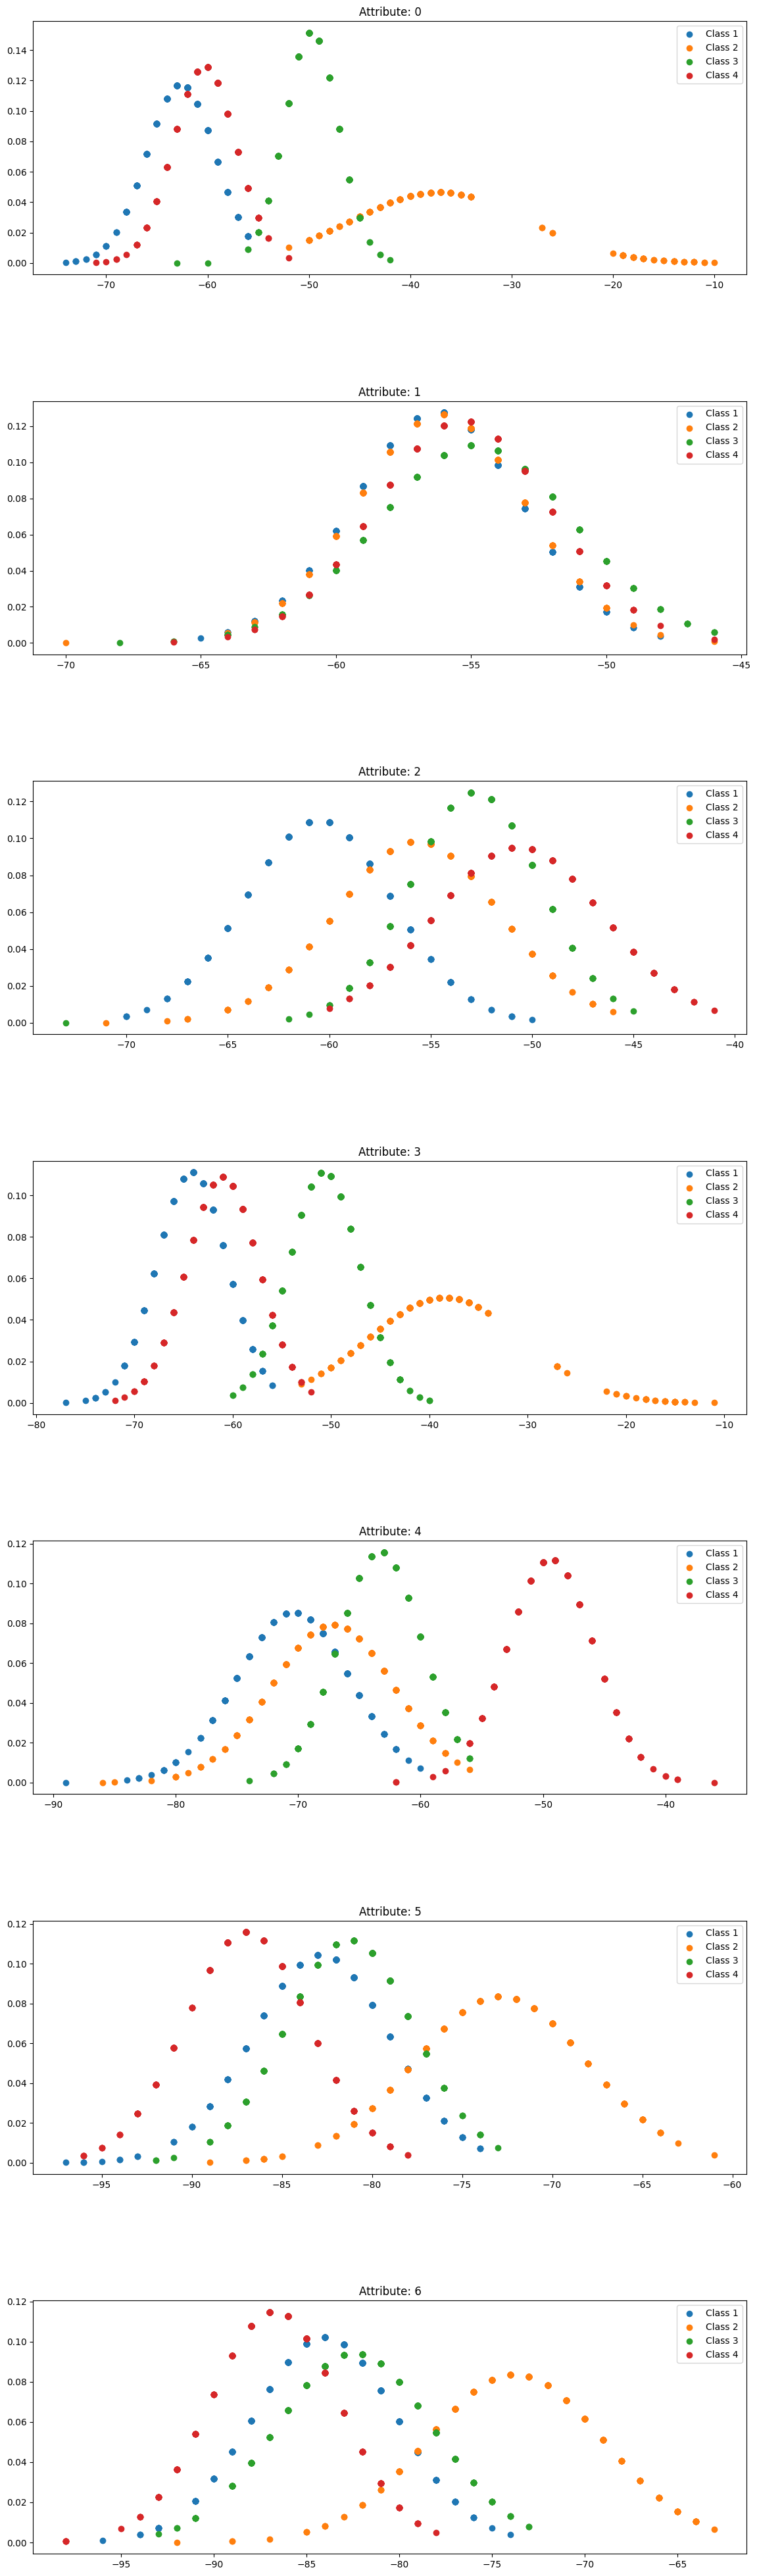

In [7]:
# 1, 2

m, n = len(np.unique(y_train)), X_train.shape[1]
Param = RetParameters(X_train,y_train)
print(np.array(Param).shape)
Prior = ComputePrior(y_train)
from scipy.stats import norm
def Test(X, y,Param,Prior,m):
    acc=0
    y_pred=[]
    for i,x in enumerate(X):
        pred = Likelihood(Param,Prior,x,m)
        if(pred == y[i]):
            acc+=1
        y_pred.append(pred)
    return y_pred, acc/len(y)

#Plot of Gaussian Distribution for each class for first attribute
fig, axes =plt.subplots(7,1,figsize=(14,50))
for i in range(n):
    axes[i].set_title(f'Attribute: {i}')
    for j in range(m):
        att = np.array([X_train[i] for i in range(len(X_train)) if y_train[i]==j+1])
        axes[i].scatter(att[:,i],[ComputeGaussian(a,Param[j][i][0],Param[j][i][1]) for a in att[:,i]],label=f'Class {j+1}')
    axes[i].legend()    

fig.subplots_adjust(hspace=0.5)

In [8]:
#3
ytrain_pred, train_acc = Test(X_train,y_train,Param,Prior,m)
ytest_pred, test_acc = Test(X_test,y_test,Param,Prior,m)
print(f'The accuracy on the train set is: {train_acc}')
print(f'The accuracy on the test set is: {test_acc} ')

The accuracy on the train set is: 0.982
The accuracy on the test set is: 0.99 


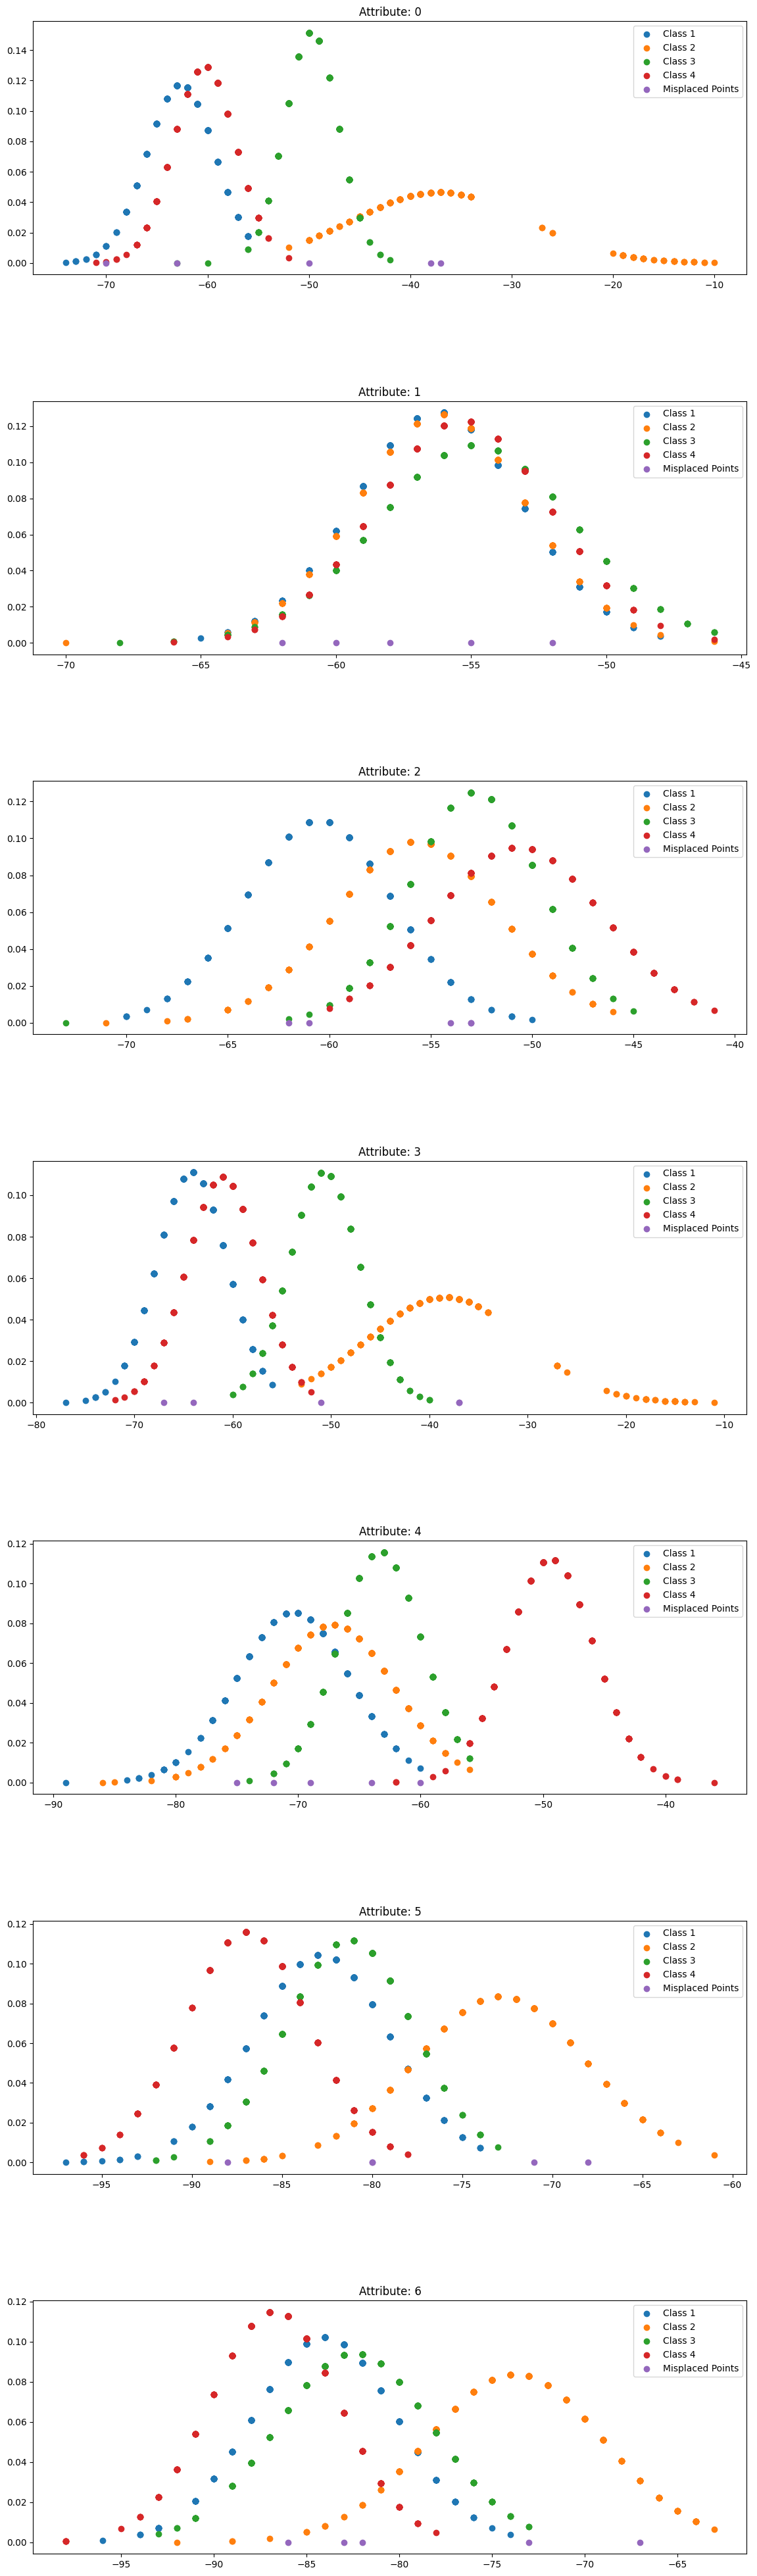

In [9]:
#4
ind =[ i for i in range(len(ytest_pred)) if y_test[i]!=ytest_pred[i]]
ind =ind[:10]
fig, axes =plt.subplots(7,1,figsize=(14,50))
for i in range(n):
    axes[i].set_title(f'Attribute: {i}')
    for j in range(m):
        att = np.array([X_train[i] for i in range(len(X_train)) if y_train[i]==j+1])
        axes[i].scatter(att[:,i],[ComputeGaussian(a,Param[j][i][0],Param[j][i][1]) for a in att[:,i]],label=f'Class {j+1}')
    axes[i].scatter([X_train[k][i] for k in range(len(ind))],[0 for k in ind ], label='Misplaced Points')
    axes[i].legend()    

fig.subplots_adjust(hspace=0.5)

X: (2000, 6)
y: (2000,)

X_train: (1500, 6)
y_train: (1500,)

X_test: (500, 6)
y_test: (500,)
The accuracy on the train set is: 0.976
The accuracy on the test set is: 0.98


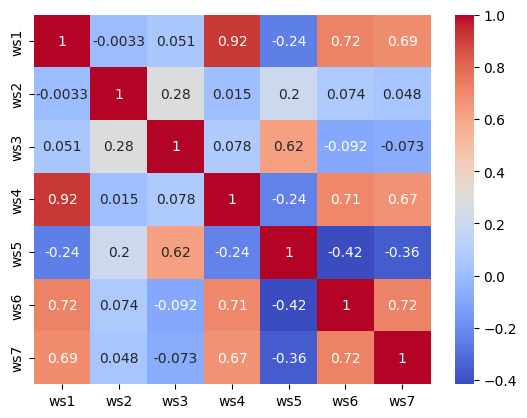

In [10]:
#5
import pandas as pd
import seaborn as sns

# Load dataset
df = data.drop(['r'],axis=1)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            if colname_i not in high_corr_features and colname_j not in high_corr_features:
                high_corr_features.add(colname_i)
df = df.drop(high_corr_features, axis=1)
X,y = df,data['r']
print(f'X: {X.shape}')
print(f'y: {y.shape}')
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print()

print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
m, n = len(np.unique(y_train)), X_train.shape[1]
Param = RetParameters(X_train,y_train)
Prior = ComputePrior(y_train)
ytrain_pred, train_acc = Test(X_train,y_train,Param,Prior,m)
ytest_pred, test_acc = Test(X_test,y_test,Param,Prior,m)
print(f'The accuracy on the train set is: {train_acc}')
print(f'The accuracy on the test set is: {test_acc}')

In [11]:
#6
X,y = data[['ws1','ws2','ws3','ws4','ws5','ws6','ws7']],data['r']
print(f'X: {X.shape}')
print(f'y: {y.shape}')
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

m= len(np.unique(y_train))
Param = RetParameters(X_train,y_train)
Prior = ComputePrior(y_train)
ytrain_pred, train_acc = Test(X_train,y_train,Param,Prior,m)
ytest_pred, test_acc = Test(X_test,y_test,Param,Prior,m)
print(f'The accuracy on the train set is: {train_acc}')
print(f'The accuracy on the test set is: {test_acc}')

X: (2000, 7)
y: (2000,)

The accuracy on the train set is: 0.982
The accuracy on the test set is: 0.99


> By removing features one by one it is seen that the accuracy is decreased the differently, so the importance of feature can be as:  
ws5> ws1>ws4>>ws5>ws6>ws3>ws2
- Initial 99
- ws7 98.6
- ws6 98.6
- ws5 95.6
- ws4 98
- ws3 98.8
- ws2 99
- ws1 96.6

In [12]:
#7
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
ytrain_pred=clf.predict(X_train)
ytest_pred=clf.predict(X_test)
print(f'Accuracy on train is {accuracy_score(y_train,ytrain_pred)}')
print(f'Accuracy on test is {accuracy_score(y_test,ytest_pred)}')


Accuracy on train is 0.982
Accuracy on test is 0.99
